## Red wine quality classifier using a Neural network

In [118]:
#Import required libraries::
import pandas as pd 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
import tensorflow as tf
import tensorflow.keras as keras
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense


### Perform EDA, Explore the features using histograms, any data preprocessing required:::

In [119]:
redWineData = pd.read_csv("./Data/winequality-red.csv")

In [120]:
redWineData.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [121]:
redWineData.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [122]:
redWineData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [123]:
redWineData.shape

(1599, 12)

In [124]:
redWineData.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

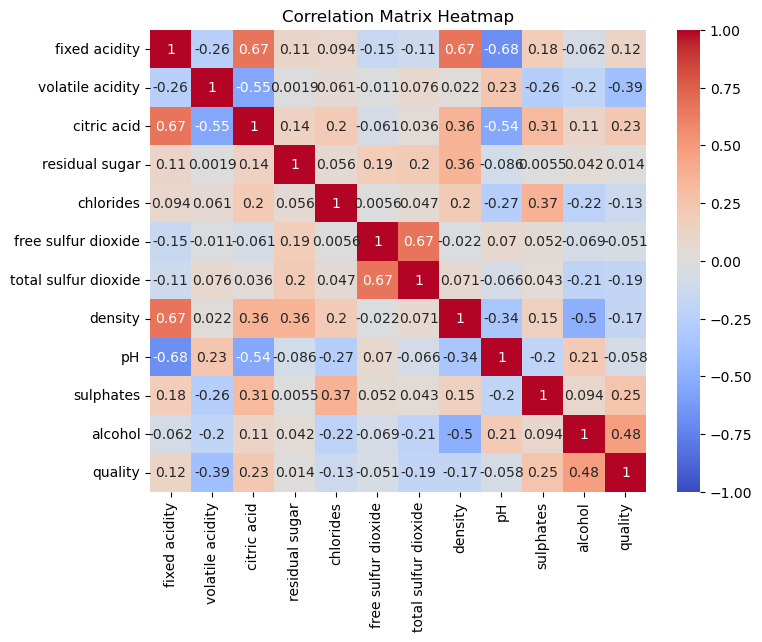

In [125]:
correlationCalc = redWineData.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlationCalc, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix Heatmap")
plt.show()


- After observation from the correlation matrix, we can see highly correlation between fixed acidity and citric acid, density, fixed acidity, pH. So, the impact will be similar so the 3 other feature can be neglected.

In [126]:
redWineData.drop(["pH","density", "citric acid"], inplace= True, axis=1)
redWineData.head(5)

,fixed acidity,volatile acidity,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol,quality
0,7.4,0.70,1.9,0.076,11.0,34.0,0.56,9.4,5
1,7.8,0.88,2.6,0.098,25.0,67.0,0.68,9.8,5
2,7.8,0.76,2.3,0.092,15.0,54.0,0.65,9.8,5
3,11.2,0.28,1.9,0.075,17.0,60.0,0.58,9.8,6
4,7.4,0.70,1.9,0.076,11.0,34.0,0.56,9.4,5


In [127]:
redWineData.columns = redWineData.columns.str.replace(' ', '_')

In [128]:
redWineData["quality"].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [129]:
encoder = LabelEncoder()
redWineData['quality'] = encoder.fit_transform(redWineData['quality'])

In [130]:
redWineData["quality"].unique()

array([2, 3, 4, 1, 5, 0], dtype=int64)

In [131]:
target = redWineData["quality"]
features = redWineData.drop(["quality"], axis=1)

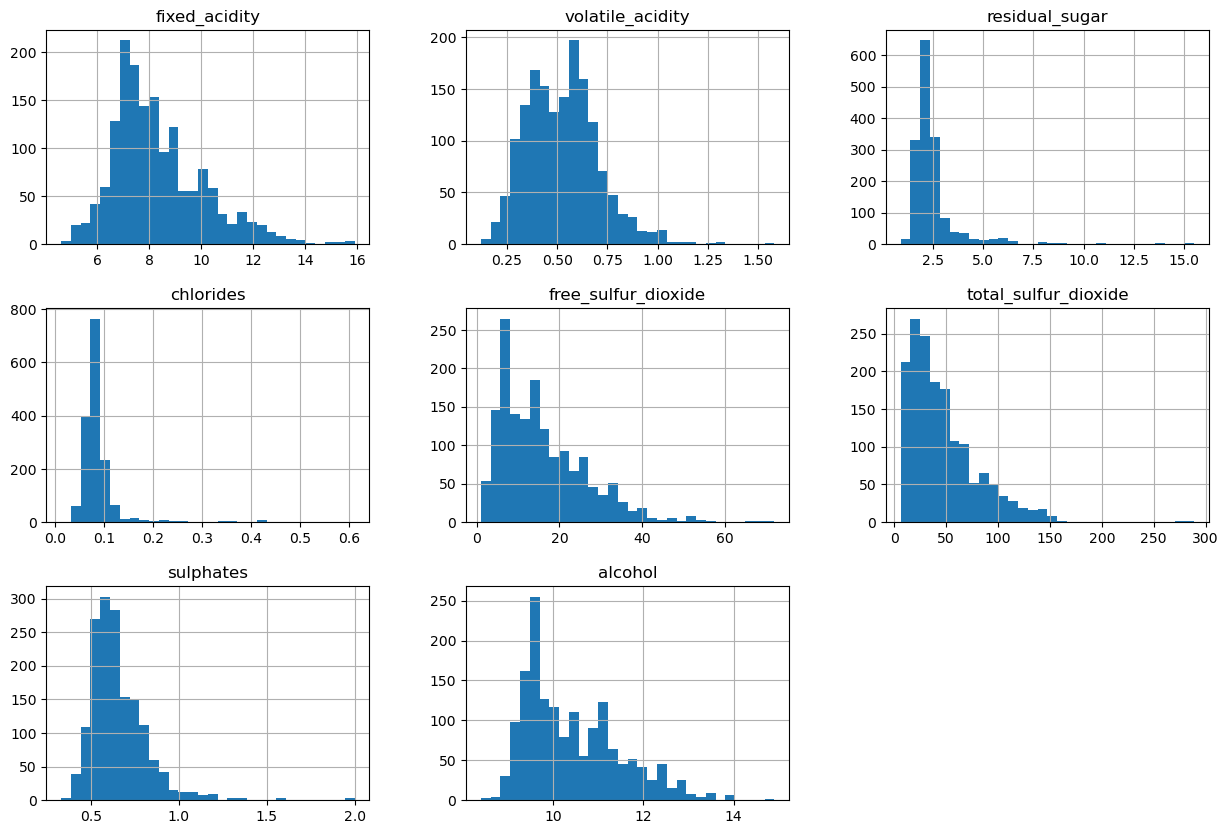

In [132]:
features.hist(bins=30, figsize=(15, 10))
plt.show()

- By the observation of the histograms, we can clearly see that these features tends to follow the normal distribution, we can also do some scaling to make the distribution more concentrated to a specfic scale.

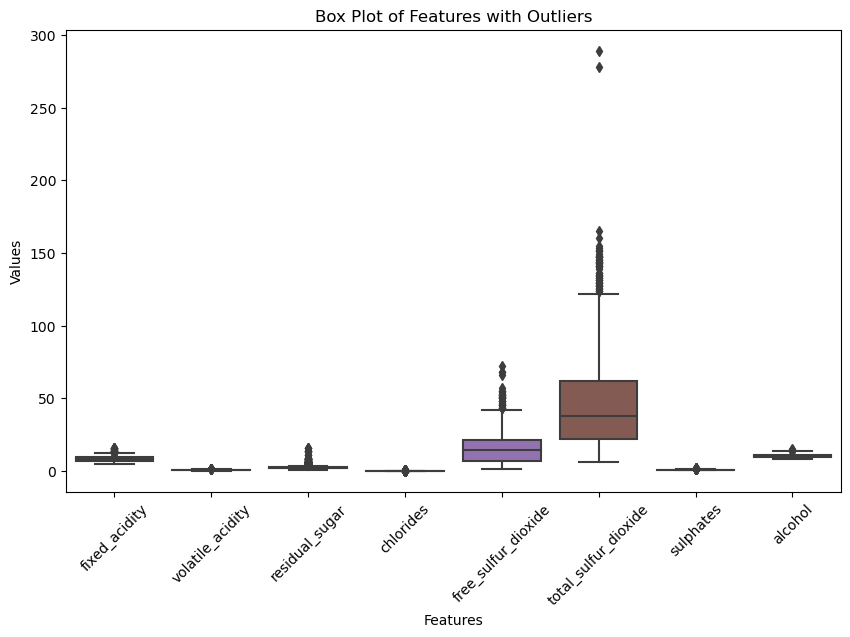

In [133]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=features)
plt.title('Box Plot of Features with Outliers')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

- We can see total_sulfur_dioxide has few outliers, which we will remove using zscore calculation.

In [134]:
z_scores = zscore(features["total_sulfur_dioxide"])
features["total_sulfur_dioxide"] = np.where(np.abs(z_scores) > 3, np.nan, features["total_sulfur_dioxide"])
features["total_sulfur_dioxide"].fillna(features["total_sulfur_dioxide"].median(), inplace=True)

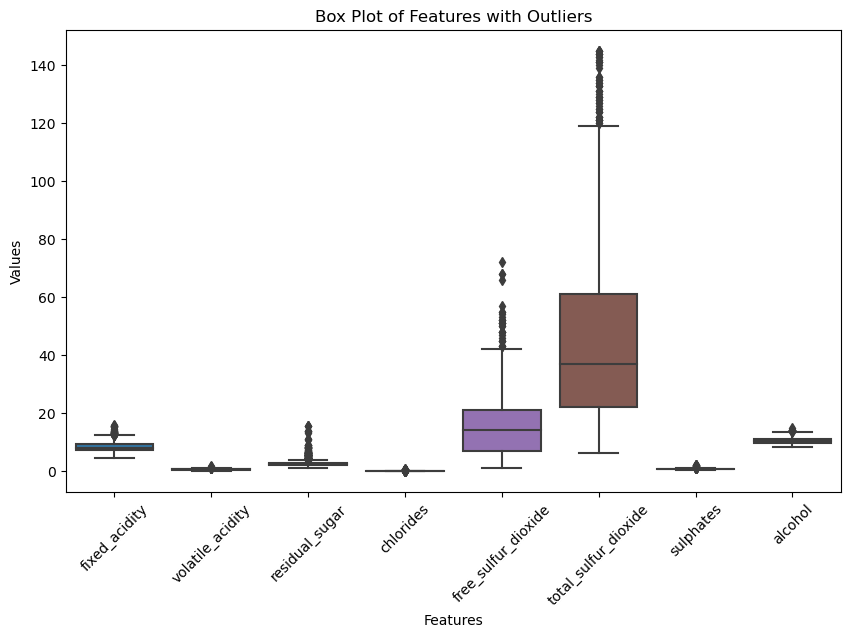

In [135]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=features)
plt.title('Box Plot of Features with Outliers')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

- The outlier is removed.

In [136]:
# We are dividing our dataset to trainning and validation set
X_train, X_val, y_train, y_val = train_test_split(features, target, test_size=0.2, random_state=0)

### NN using Tensorflow Estimator DNN Classifier implementation:::

In [137]:
train_input_fn = tf.compat.v1.estimator.inputs.pandas_input_fn(
    x=X_train,
    y=y_train,
    batch_size=32,
    num_epochs=None,
    shuffle=True)

eval_input_fn = tf.compat.v1.estimator.inputs.pandas_input_fn(
    x=X_val,
    y=y_val,
    batch_size=32,
    num_epochs=1,
    shuffle=False)

In [138]:
feature_columns = []
for feature_name in features.columns:
    feature_columns.append(tf.feature_column.numeric_column(feature_name.replace(' ', '_'), dtype=tf.float32))

model = tf.estimator.DNNClassifier(
    feature_columns=feature_columns,
    hidden_units=[10, 20, 10],
    n_classes=6)

steps = 25
dnn_history = {'accuracy': [], 'val_accuracy': [], 'loss': [], 'val_loss': []}
for i in range(steps):
    print(f"Running for the {i} step")
    model.train(input_fn=train_input_fn, steps=1)
    eval_result = model.evaluate(input_fn=eval_input_fn)
    dnn_history['accuracy'].append(eval_result['accuracy'])
    dnn_history['val_accuracy'].append(eval_result['accuracy'])
    dnn_history['loss'].append(eval_result['loss'])
    dnn_history['val_loss'].append(eval_result['loss'])

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\aacic\\AppData\\Local\\Temp\\tmp7qxlgc1f', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Running for the 0 step
INFO:tensorflow:Calling

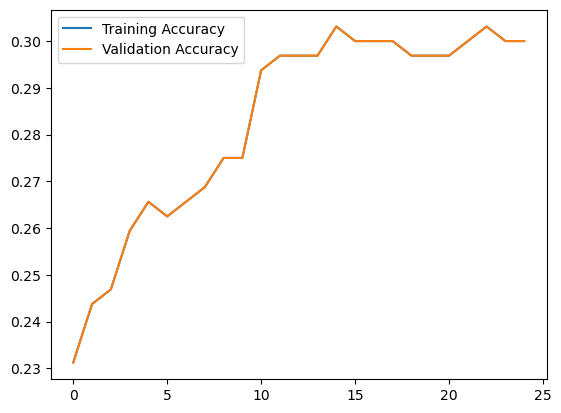

In [139]:
plt.plot(dnn_history['accuracy'], label='Training Accuracy')
plt.plot(dnn_history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()


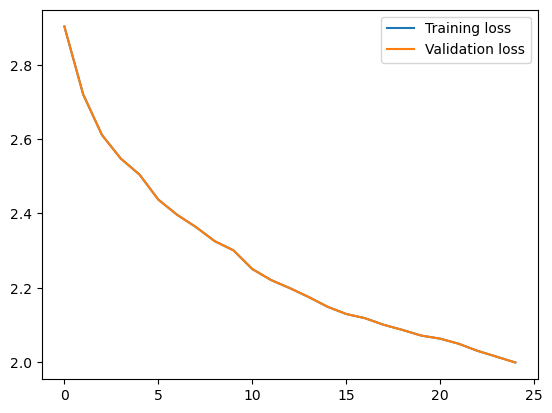

In [140]:
plt.plot(dnn_history['loss'], label='Training loss')
plt.plot(dnn_history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

- for this NN with the DNN classifier, we can see same kind of graph for loss and accuracy for both training and validation dataset, loss was really high at first and started to decrease significantly in each epochs. Also, for accuracy, the percentage was only slightly above 30% at highest, and have negligible change after 13th epoch.

### Neural Net using Keras implementation:::

In [141]:
onehot_encoder = OneHotEncoder(sparse_output=False, categories='auto')
y_train = onehot_encoder.fit_transform(np.array(y_train).reshape(-1, 1))
y_val = onehot_encoder.fit_transform(np.array(y_val).reshape(-1, 1))

In [142]:
nNmodel = Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(6, activation='softmax')
    ])

nNmodel.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 128)               1152      
                                                                 
 dropout_12 (Dropout)        (None, 128)               0         
                                                                 
 dense_17 (Dense)            (None, 64)                8256      
                                                                 
 dropout_13 (Dropout)        (None, 64)                0         
                                                                 
 dense_18 (Dense)            (None, 16)                1040      
                                                                 
 dropout_14 (Dropout)        (None, 16)                0         
                                                                 
 dense_19 (Dense)            (None, 6)                

In [143]:
nNmodel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = nNmodel.fit(X_train, y_train, epochs=25, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/25


40/40 [==============================] - 1s 5ms/step - loss: 1.6196 - accuracy: 0.3440 - val_loss: 1.2702 - val_accuracy: 0.4375
Epoch 2/25
40/40 [==============================] - 0s 2ms/step - loss: 1.4063 - accuracy: 0.3870 - val_loss: 1.1863 - val_accuracy: 0.4469
Epoch 3/25
40/40 [==============================] - 0s 2ms/step - loss: 1.3667 - accuracy: 0.3948 - val_loss: 1.1672 - val_accuracy: 0.4187
Epoch 4/25
40/40 [==============================] - 0s 2ms/step - loss: 1.3137 - accuracy: 0.4324 - val_loss: 1.1626 - val_accuracy: 0.4187
Epoch 5/25
40/40 [==============================] - 0s 2ms/step - loss: 1.3110 - accuracy: 0.4246 - val_loss: 1.1480 - val_accuracy: 0.4594
Epoch 6/25
40/40 [==============================] - 0s 2ms/step - loss: 1.2633 - accuracy: 0.4464 - val_loss: 1.1439 - val_accuracy: 0.5406
Epoch 7/25
40/40 [==============================] - 0s 2ms/step - loss: 1.2633 - accuracy: 0.4699 - val_loss: 1.1284 - val_accuracy: 0.5281
Epoch 8/25
40/40 [=============

### Training & Validation Accuracy plots::::

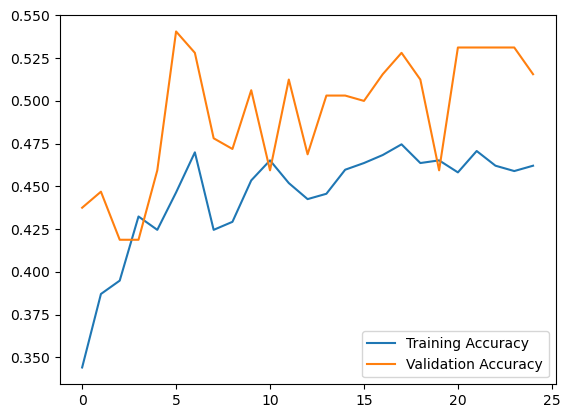

In [144]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

- As we can see the plot for accuracy of validation and trainning data; the both graph shows similar kind of pattern. The accuracy of red wine quality test was only 32% on the initial epochs which later on reach more than 47% while going upto 25 epochs for validation dataset whilst shows little bit less accurate in trainning dataset. Even if we go up that 25 epoch , I donot think the it will help to increase the accuracy for this dataset.

### Training & Validation Loss plots:::

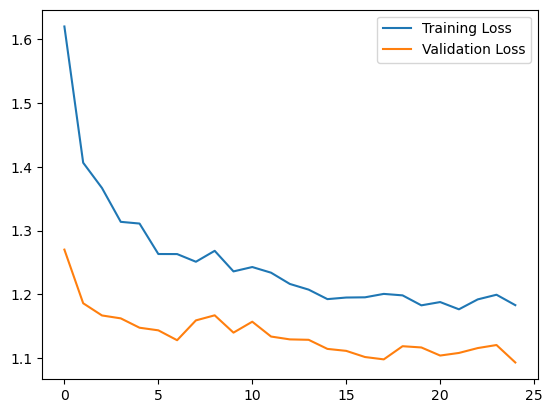

In [145]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

- Similarly, the loss plot for the train and validation data; it was minimized to less than 1.2 from 1.7 for training data and 1.35 to less than 1.2. Both graph shows steady loss after 10-11 epochs. 

### Conclusion:::

- We implemented the Neural Newtwork using sequential function of keras and also using keras DNN classifier. Overall, the later neural network shows the better performance than the first one using DNN classifier in terms of accuracy as well as loss. Both are from the tensorflow should give similar result for the same dataset as the underlying process is same for the both methods. Usually we can use DNN classifier for classification task with multiple hidden layers whilst keras api provides activation functions which can be used for binary as well as multiclass classification.